In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=2)

In [4]:
X = pd.DataFrame(X)

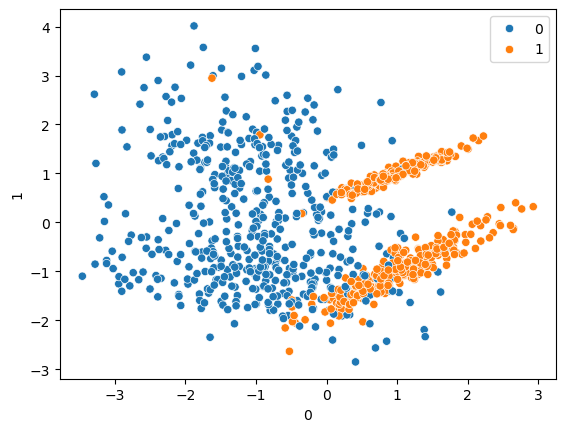

In [5]:
sns.scatterplot(x=X[0],y=X[1],hue=y)
plt.show()

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [7]:
X_train.shape,y_train.shape

((750, 2), (750,))

In [8]:
# model training
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [10]:
svc.coef_

array([[ 1.83566797, -0.10888072]])

In [11]:
svc.intercept_

array([-0.20609051])

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       125
           1       0.87      0.97      0.92       125

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[107  18]
 [  4 121]]


In [15]:
print(accuracy_score(y_test,y_pred))

0.912


## try with another kernal

In [16]:
rbf = SVC()
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(matrix)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       125
           1       0.88      0.97      0.92       125

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109  16]
 [  4 121]]
0.92


In [17]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred = sigmoid.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(matrix)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       125
           1       0.85      0.90      0.88       125

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[105  20]
 [ 12 113]]
0.872


In [26]:
poly = SVC(kernel='poly',verbose=1)
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(matrix)
print(accuracy_score(y_test,y_pred))

[LibSVM]              precision    recall  f1-score   support

           0       0.94      0.86      0.90       125
           1       0.87      0.94      0.91       125

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[108  17]
 [  7 118]]
0.904


## lets do some more Hyperparanmeter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'coef0': [0.0, 0.1, 0.5, 1.0],       # Independent term in kernel function (for 'poly' and 'sigmoid')
    'shrinking': [True, False],          # Whether to use the shrinking heuristic
}


In [30]:
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring='accuracy',verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=True;, score=0.880 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=True;, score=0.913 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=True;, score=0.907 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=True;, score=0.940 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=True;, score=0.907 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=False;, score=0.880 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=False;, score=0.913 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=False;, score=0.907 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, gamma=scale, kernel=rbf, shrinking=False;, score=0.940 total time=   0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 0.5, 1.0],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf'], 'shrinking': [True, False]},
             scoring='accuracy', verbose=3)

In [32]:
grid.best_params_

{'C': 100, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}

In [33]:
grid.best_score_

0.9359999999999999